In [24]:
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from pandas.plotting import scatter_matrix
import mglearn
import matplotlib.pyplot as plt

In [27]:
cancer = load_breast_cancer()

In [29]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [30]:
cancer["data"].shape

(569, 30)

In [35]:
x, y =mglearn.datasets.load_extended_boston()

In [37]:
x.shape

(506, 104)

In [38]:
x, y = mglearn.datasets.make_forge()

/home/n0pj/.conda/envs/ml/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


/home/n0pj/.conda/envs/ml/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


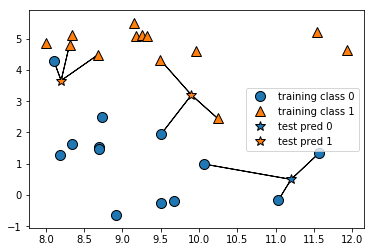

In [41]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [63]:
knn = KNeighborsClassifier(n_neighbors=3)

In [64]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [65]:
knn.predict(x_test)

array([1, 0, 1, 0, 1, 0, 0])

In [66]:
knn == y_test

array([False, False, False, False, False, False, False])

In [67]:
knn.score(x_test, y_test)

1.0

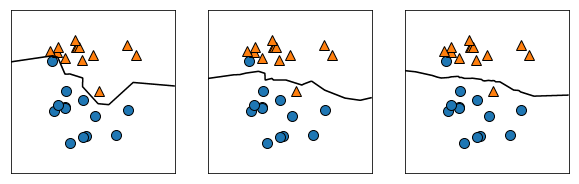

In [76]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x, y)
    mglearn.plots.plot_2d_separator(clf, x, ax=ax)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax=ax)
    

In [77]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f49f9eb8400>,
      dtype=object)

In [80]:
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target)

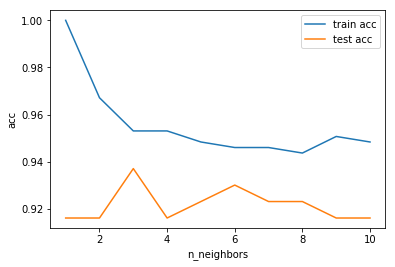

In [85]:
training_accuracy = []
test_accuracy = []
n_neighbors_s = range(1, 11)
for n_neighbors in n_neighbors_s:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    
    training_accuracy.append(clf.score(x_train, y_train))
    
    test_accuracy.append(clf.score(x_test, y_test))

plt.plot(n_neighbors_s, training_accuracy, label="train acc")
plt.plot(n_neighbors_s, test_accuracy, label="test acc")
plt.ylabel("acc")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

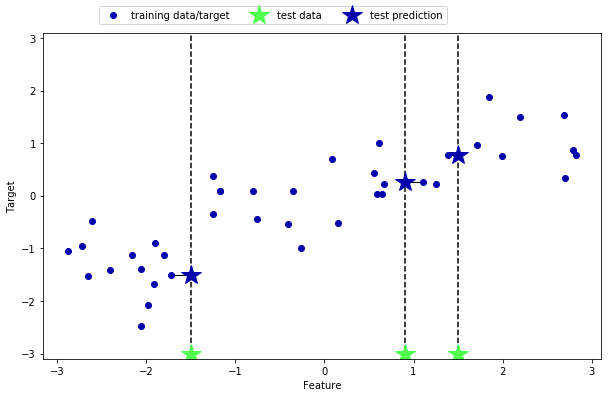

In [86]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [87]:
from sklearn.neighbors import KNeighborsRegressor

In [88]:
x, y =mglearn.datasets.make_wave(n_samples=40)

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [90]:
reg = KNeighborsRegressor(n_neighbors=3)

In [91]:
reg.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [94]:
reg.score(x_test, y_test)

0.7161861468140365

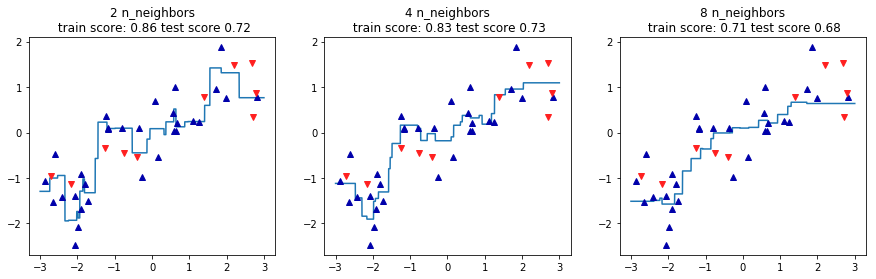

In [118]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-3, 3, 10000).reshape(-1, 1)
for n_neighbors, ax in zip([2, 4, 8], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(x_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(x_train, y_train, "^", c=mglearn.cm2(0))
    ax.plot(x_test, y_test, "v", c=mglearn.cm2(1))
    ax.set_title(
        "{} n_neighbors\n train score: {:.2f} test score {:.2f}".format(n_neighbors,
                                                                      reg.score(x_train, y_train),
                                                                      reg.score(x_test, y_test)))